In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.interpolate import interp1d
%matplotlib inline

In [2]:
#FUNCIONES

#funcion para obtener distancias
def dist(x_d,x_r,y_d,y_r):
    dis=np.sqrt((x_d - x_r)**2 + (y_d-y_r)**2)
    return dis

#estimador Landy-Zslay
def LZ(ContD,ContR,ContDR):
    corr_D=ContD/ND_D
    corr_R=ContR/ND_R
    corr_DR=ContDR/ND_DR
    corrLZ= (corr_D+corr_R-2*corr_DR)/corr_R
    return corrLZ

#Estimador Hewett
def HEW(ContD,ContR,ContDR):
    corr_D=ContD/ND_D
    corr_R=ContR/ND_R
    corr_DR=ContDR/ND_DR
    corrHEW= (corr_D-corr_DR)/corr_R
    return corrHEW

#Estimador David & Peebles
def DP(ContD,ContR,ContDR):
    corr_D=ContD/ND_D
    corr_R=ContR/ND_R
    corr_DR=ContDR/ND_DR
    corrDP= (corr_D/corr_DR)-1
    return corrDP

#Estimador Hamilton
def HAM(ContD,ContR,ContDR):
    corr_D=ContD/ND_D
    corr_R=ContR/ND_R
    corr_DR=ContDR/ND_DR
    corrHAM= (corr_D*corr_R)/(corr_DR)**2 -1
    return corrHAM

In [30]:

#definir distancias, los datos se encuentran en un solo arreglo
def D_RR(x,y,N1,tbin):
    for i in range(N1): 
        for j in range(i+1,N1):
            DD=dist(dat[0][i],dat[0][j],dat[1][i],dat[1][j]) #distancias
            indice1=int(DD//tbin)  #checar bin
          
            ContD[indice1]=ContD[indice1]+1 #Contador de indices
            
    #DD=ContD/D
           
    return ContD

def D_DR(dat, dat_r,N1,N2,ContD,tbin ):
    for i in range(N1):
    
        for j in range(N2):
            DR= dist(dat[0][i],dat_r[0][j],dat[1][i],dat_r[1][j])
            indice3=int(DR//tbin)      
            ContDR[indice3]=ContDR[indice3]+1
    #DR=ContDR/D
            
    return ContDR

#funcion de parametros de correlacion
def DD(dat,N1,Histo1,tbin,ND_D):
    d=dist(dat,N1,Histo1,tbin)/ND_D
    return d

def RR(dat_r,nr,Histo2,tbin, ND_R):
    r=distancias2d(random,nr,Histo2,tbin)/ND_R
    return r

def DR(dat,dat_r,N1,N2,Histo3,tbin,ND_DR):
    dr=distancias2ddr(datos,random,nd,nr,Histo3,tbin)/ND_DR
    return dr

In [167]:
L=100#tamanio caja
np.random.seed(0)


#bins
dmin=0.0
dmax=np.sqrt(2.)*L
nbins=50
bins=np.linspace(dmin,dmax,nbins) #bins
tbin=(dmax-dmin)/nbins #tamanio bins

#arreglo  datos disco en polares
N1=1000 #puntos de datos
ND_D=N1*(N1-1)/2 #distancias datos
ri=0.8 #radio interior
re=1. #radio exterior

c_x=50.0 #centrado x
c_y=50.0 #centrado y

r_ani=2*np.pi*np.random.uniform(ri,re,N1)#*L  #puntos sobre radio anillo
phi= 2 * np.pi * np.random.rand(N1) #angulo polares
x_d= r_ani*np.cos(phi)+c_x #coordenada x
y_d=r_ani*np.sin(phi)+c_y #coordenada y


#arreglo aleatorio 
N2=5*N1 #puntos aleatorios
ND_R=N2*(N2-1)/2 #distancias aleatorias


x_r = L*np.random.uniform(0.,1.,N2)
y_r= L*np.random.uniform(0.,1.,N2)


ND_DR=N1*N2 #distancias entre datos y aleatorios

dis_DD=[]
dis_RR=[]
dis_DR=[]

#Contadores histogramas
Histo1=np.zeros(nbins)
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)

ND_DR=N1*N2 #distancias entre datos y aleatorios

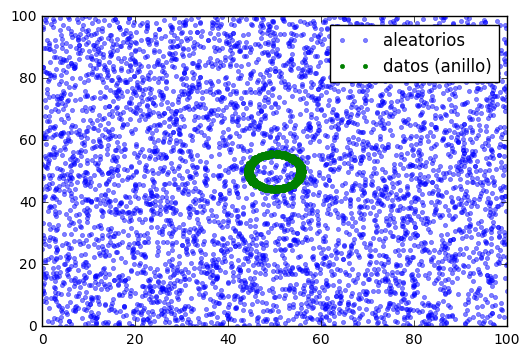

In [168]:
plt.plot(x_r,y_r,'.',label='aleatorios', alpha=0.5)
plt.plot(x_d,y_d,'.',label='datos (anillo)')
plt.legend()

In [169]:
#agregar peso w=1 para todos x<50 y w=2 para x>50
for i in range(N1):
    if (x_d[i]<50):
        y_d[i]=1
    else:
        y_d[i]=2  



In [170]:
dis_DD=[]
dis_RR=[]
dis_DR=[]

#DD
for i in range(N1):
    for j in range(i+1,N1):
        dd = dist(x_d[i],x_d[j],y_d[i],y_d[j])
        dis_DD.append(dd)
#RR
for i in range(N2):
    for j in range(i+1,N2):
        rr = dist(x_r[i],x_r[j],y_r[i],y_r[j])
        dis_RR.append(rr)
#DR
for i in range(N1):
    for j in range(i+1,N2):
        dr = dist(x_d[i],x_r[j],y_d[i],y_r[j])
        dis_DR.append(dr)  

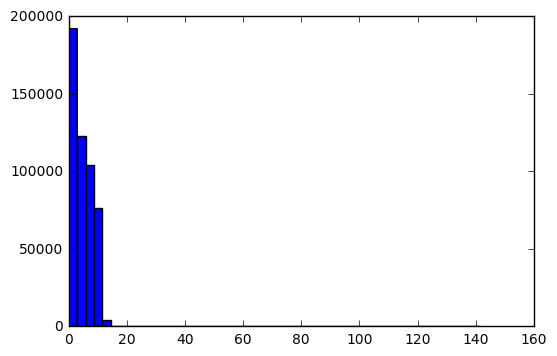

In [171]:
#hacer histogramas
#DD
d_DD, DD_bins,a= plt.hist(dis_DD,bins=bins) #organiza los datos


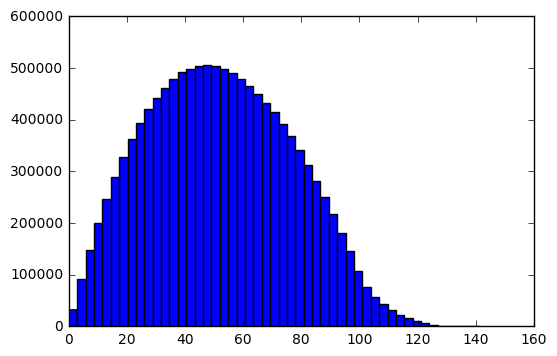

In [172]:
#hacer histogramas
#RR
d_RR, RR_bins,a= plt.hist(dis_RR,bins=bins) #organiza los datos

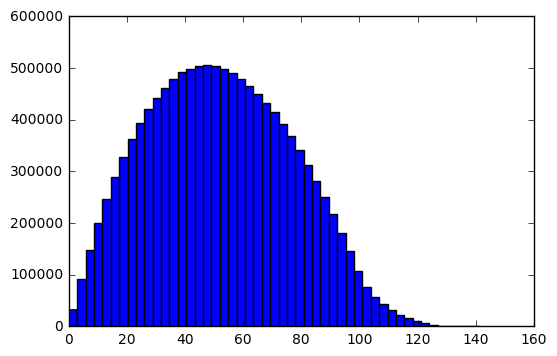

In [173]:
#hacer histogramas
#DR
d_DR, DR_bins,a= plt.hist(dis_RR,bins=bins) #organiza los datos

In [174]:
corr_D=d_DD/ND_D
corr_R=d_RR/ND_R
corr_DR=d_DR/ND_DR

C:\Users\Marco\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()
C:\Users\Marco\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in divide
C:\Users\Marco\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in divide
C:\Users\Marco\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in divide


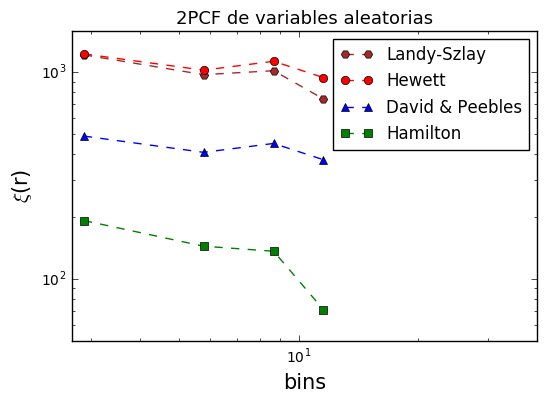

In [195]:
#funciones de correlacion
name1='Landy-Szlay'
corr1= (corr_D+corr_R-2*corr_DR)/corr_R

name2='Hewett'
corr2= (corr_D-corr_DR)/corr_R

name3='David & Peebles'
corr3= (corr_D/corr_DR)-1

name4='Hamilton'
corr4= (corr_D*corr_R)/(corr_DR)**2 -1

#Graficar
#v= [np.min(x_d), np.max(x_d), np.log(np.min(y_d)), np.log(np.max(y_d))]

plt.loglog(bins[1:],corr1*np.power(bins[1:],2),'--H',label=str(name1),color='brown')
plt.loglog(bins[1:],corr2*np.power(bins[1:],2),'--o',label=str(name2),color='red')
plt.loglog(bins[1:],corr3*np.power(bins[1:],2),'--g^',label=str(name3),color='blue')
plt.loglog(bins[1:],corr4*np.power(bins[1:],2),'--s',label=str(name4),color='green')
 
plt.title('2PCF de variables aleatorias',fontsize=13)
plt.xlabel('bins',fontsize=15)
plt.ylabel(r'$\xi$(r)',fontsize=15)
plt.xlim(2.7,10**1.6)
plt.ylim(50,10**3.2)
plt.legend()
#plt.legend(bbox_to_anchor=(0.78, 0.90), loc=0, borderaxespad=0.6,prop={'size':10})

# Dos anillos

In [150]:
L=100#tamanio caja
np.random.seed(0)


#bins
dmin=0.0
dmax=np.sqrt(2.)*L
nbins=50
bins=np.linspace(dmin,dmax,nbins) #bins
tbin=(dmax-dmin)/nbins #tamanio bins

#ANILLO 1
#arreglo  datos disco en polares
N1=1000 #puntos de datos
ND_D=N1*(N1-1)/2 #distancias datos
ri=0.8 #radio interior
re=1. #radio exterior

c_x=50.0 #centrado x
c_y=50.0 #centrado y

r_ani=2*np.pi*np.random.uniform(ri,re,N1)#*L  #puntos sobre radio anillo
r=np.sqrt(r_ani)+4.3
phi= 2 * np.pi * np.random.rand(N1) #angulo polares
x_d= r*np.cos(phi)+c_x #coordenada x
y_d=r*np.sin(phi)+c_y #coordenada y

#ANILLO 2
c_x=50.0 #centrado x
c_y=50.0 #centrado y

r_ani2=0.5*np.pi*np.random.uniform(ri,re,N1)#*L  #puntos sobre radio anillo
phi2= 0.5 * np.pi * np.random.rand(N1)+30 #angulo polares
x_d2= r_ani*np.cos(phi)+c_x #coordenada x
y_d2=r_ani*np.sin(phi)+c_y #coordenada y


#arreglo aleatorio 
N2=5*N1 #puntos aleatorios
ND_R=N2*(N2-1)/2 #distancias aleatorias


x_r = L*np.random.uniform(0.,1.,N2)
y_r= L*np.random.uniform(0.,1.,N2)


ND_DR=N1*N2 #distancias entre datos y aleatorios

dis_DD=[]
dis_RR=[]
dis_DR=[]

#Contadores histogramas
Histo1=np.zeros(nbins)
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)

ND_DR=N1*N2 #distancias entre datos y aleatorios

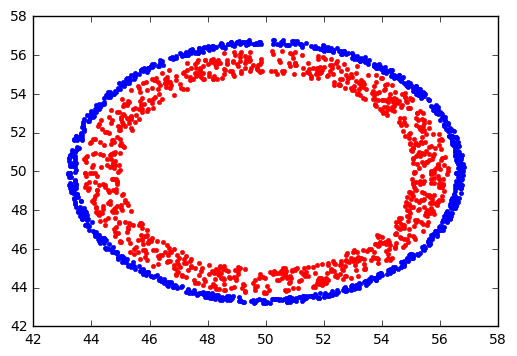

In [151]:
plt.plot(x_d,y_d,'.',c='b')
plt.plot(x_d2,y_d2,'.',c='r')

In [152]:
x_anill=np.concatenate((x_d,x_d2))
y_anill=np.concatenate((y_d,y_d2))
print np.shape(x_anill)

(2000L,)


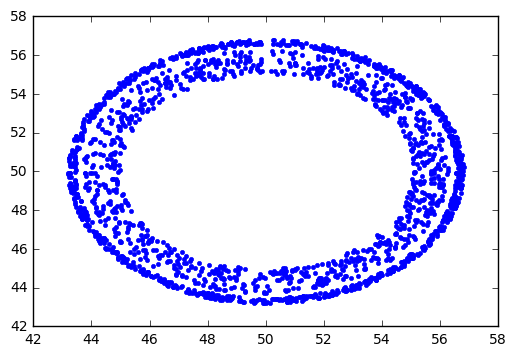

In [153]:
plt.plot(x_anill,y_anill,'.')

In [155]:
dis_DD=[]
dis_RR=[]
dis_DR=[]
#obtener distancias

#DD
for i in range(N1):
    for j in range(i+1,N1):
        dd = dist(x_anill[i],x_anill[j],y_anill[i],y_anill[j])
        dis_DD.append(dd)
#RR
for i in range(N2):
    for j in range(i+1,N2):
        rr = dist(x_r[i],x_r[j],y_r[i],y_r[j])
        dis_RR.append(rr)
#DR
for i in range(N1):
    for j in range(i+1,N2):
        dr = dist(x_anill[i],x_r[j],y_anill[i],y_r[j])
        dis_DR.append(dr) 


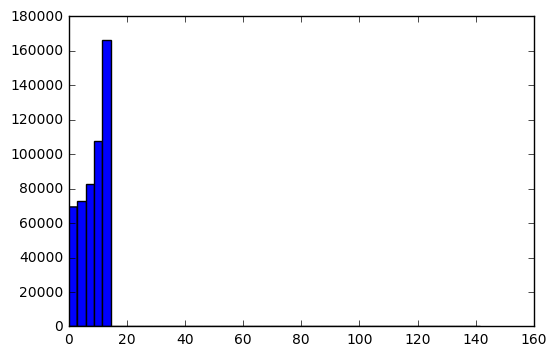

In [156]:
#hacer histogramas
#DD
d_DD, DD_bins,a= plt.hist(dis_DD,bins=bins) #organiza los datos


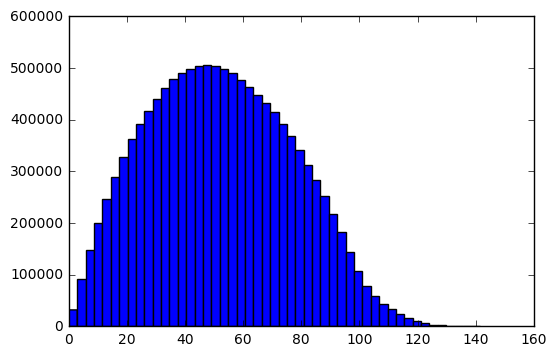

In [157]:
#hacer histogramas
#RR
d_RR, RR_bins,a= plt.hist(dis_RR,bins=bins) #organiza los datos

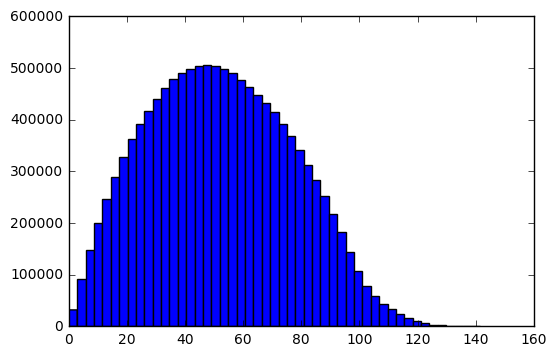

In [158]:
#hacer histogramas
#DR
d_DR, DR_bins,a= plt.hist(dis_RR,bins=bins) #organiza los datos

In [159]:
corr_D=d_DD/ND_D
corr_R=d_RR/ND_R
corr_DR=d_DR/ND_DR

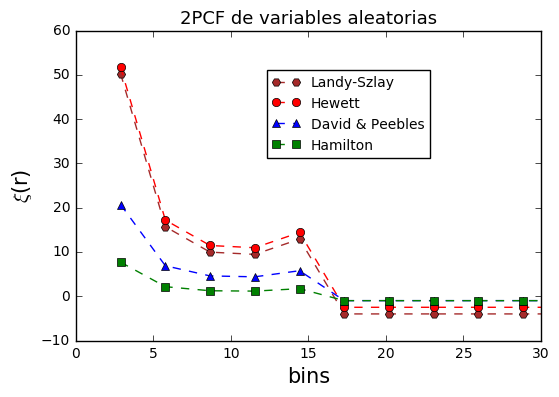

In [166]:
#funciones de correlacion
name1='Landy-Szlay'
corr1= (corr_D+corr_R-2*corr_DR)/corr_R

name2='Hewett'
corr2= (corr_D-corr_DR)/corr_R

name3='David & Peebles'
corr3= (corr_D/corr_DR)-1

name4='Hamilton'
corr4= (corr_D*corr_R)/(corr_DR)**2 -1

#Graficar

plt.plot(bins[1:],corr1,'--H',label=str(name1),color='brown')
plt.plot(bins[1:],corr2,'--o',label=str(name2),color='red')
plt.plot(bins[1:],corr3,'--g^',label=str(name3),color='blue')
plt.plot(bins[1:],corr4,'--s',label=str(name4),color='green')
plt.xlim(0,30)

plt.title('2PCF de variables aleatorias',fontsize=13)
plt.xlabel('bins',fontsize=15)
plt.ylabel(r'$\xi$(r)',fontsize=15)
plt.legend(bbox_to_anchor=(0.78, 0.90), loc=0, borderaxespad=0.6,prop={'size':10})